## <p style="text-align: right;"> Ndeye Gueye </p>

### KNN Anomaly Detection using PyCaret

In [19]:
# installing pycaret library 
!pip install pycaret


Defaulting to user installation because normal site-packages is not writeable


In [57]:
#importing needed modules
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
%matplotlib notebook
import pickle
from scipy.io import loadmat
# Enable interactive plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from datetime import datetime , timedelta, timezone
from scipy.io import loadmat
from pycaret.anomaly import *
from pycaret.clustering import *
import plotly.graph_objects as go 
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


<IPython.core.display.Javascript object>


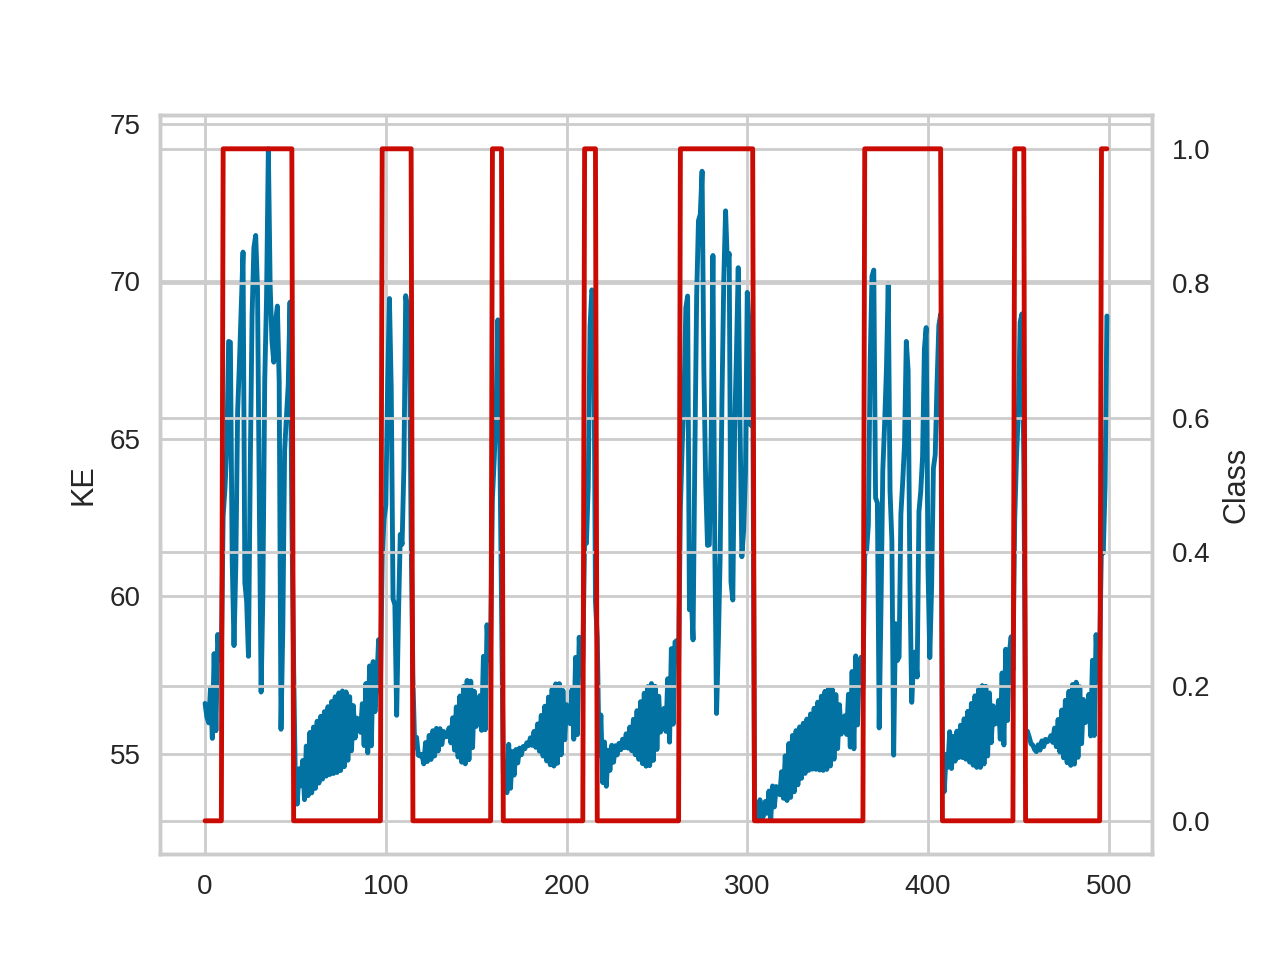

Text(0, 0.5, 'Class')

In [35]:
#code provided by Argonne
back=10
forw=10
Kol=loadmat('Kol_Label.mat')
Kol
w=Kol['w'] #This data is separated every 5 time units
state=Kol['state'].squeeze()
state=state[1:]
state
[M,N1,N2]=w.shape
w=w.reshape(M,-1)
w=w[1:]

fix,ax=plt.subplots()
ax.plot(np.linalg.norm(w[500:1000,:],axis=1))
ax.set_ylabel('KE')
ax2=ax.twinx()
ax2.plot(state[500:1000],'r-')
ax2.set_ylabel('Class')

In [45]:
print(np.linalg.norm(w,axis=1))
print(w) #what is w?

[53.51811589 54.60877617 53.46717475 ... 54.65259779 53.31396045
 54.88685817]
[[-1.16449491 -0.80203676 -0.4162842  ... -2.49162738 -2.12162869
  -1.74074165]
 [-1.19841068 -0.93397322 -0.60232045 ... -2.76326003 -2.28655089
  -1.85679215]
 [-0.55424127 -0.20398578  0.17084433 ... -2.36813979 -1.82110539
  -1.33026966]
 ...
 [-0.62600358 -0.60419795 -0.52960225 ... -1.15662077 -0.95805289
  -0.91682012]
 [-0.71504558 -0.50877734 -0.30653438 ... -1.35470429 -1.25705596
  -1.13560129]
 [-1.00561823 -0.90045798 -0.73407308 ... -1.6477765  -1.48848609
  -1.40737326]]


'w' is the vorticity, vector that describes local spinning

<IPython.core.display.Javascript object>


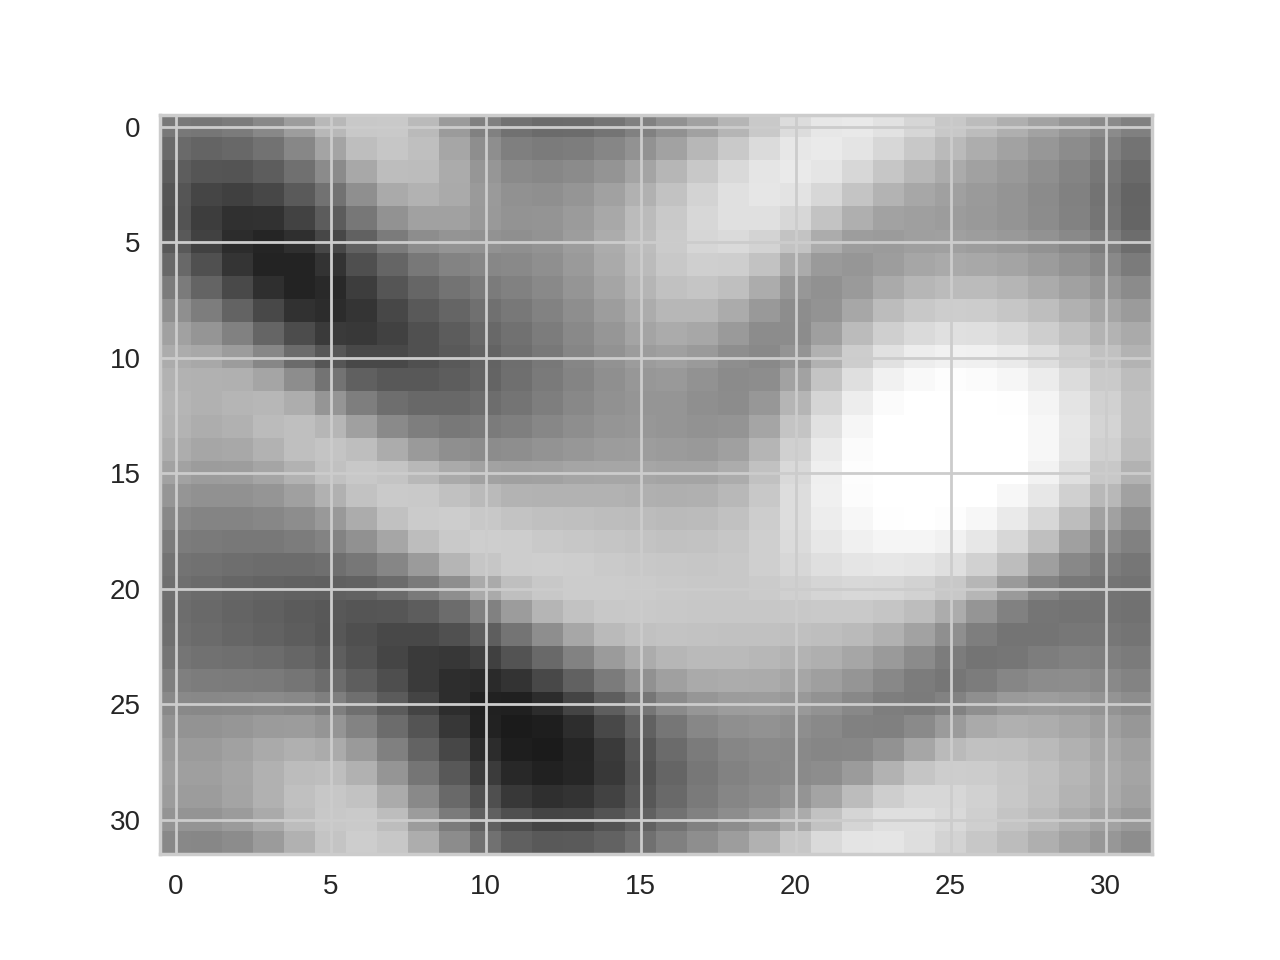

In [40]:
fig, ax = plt.subplots()
im = plt.imshow(w[0].reshape(32,32), interpolation='none', aspect='auto')
# image, = ax.imshow([])

def animate(frame_num):
    data = w[1+frame_num].reshape(32,32)
    im.set_array(data)
    return [im]

anim = FuncAnimation(fig, animate, frames=1000, interval=100)
# anim.save('test_anim.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()

Having a difficult time understaning the dataset, I decided to use the converted dataset to CSV file by one of my team members Emani Hunter. 

The dataset contain an arbitrary timestamp separated every 5 time units, How do we know this? it was provided noted by our sponsor above

The dataset also contained the normalized vorticity ('w')

In [123]:
#loading converted dataset
df = pd.read_csv('sponosor_converted_data.csv')
df = df.drop(["Unnamed: 0"], axis=1) # column not needed

In [100]:
df

timestamp          w
0        0.00000  53.518116
1        0.00005  54.608776
2        0.00010  53.467175
3        0.00015  54.052605
4        0.00020  54.248143
...          ...        ...
99975    4.99980  54.160427
99976    4.99985  53.263051
99977    4.99990  54.652598
99978    4.99995  53.313960
99979    5.00000  54.886858

[99980 rows x 2 columns]

In [101]:
df = df.set_index("timestamp") # setting the timestap as the index 

In [102]:
df

w
timestamp           
0.00000    53.518116
0.00005    54.608776
0.00010    53.467175
0.00015    54.052605
0.00020    54.248143
...              ...
4.99980    54.160427
4.99985    53.263051
4.99990    54.652598
4.99995    53.313960
5.00000    54.886858

[99980 rows x 1 columns]

In [103]:
from pycaret.anomaly import * # unsupervised anomaly detection module 

In [104]:
#setting up the environment provides features and information about the dataset
s = setup(df, session_id = 100)

In [105]:
#list of provided models by from the set up environment above 
models()

Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

In [106]:
# training the model 
knn = create_model('knn') # creating the model 
knn_results = assign_model(knn) # assigning KNN algorithmn to the model  
knn_results


w  Anomaly  Anomaly_Score
timestamp                                   
0.00000    53.518116        0       0.000404
0.00005    54.608776        0       0.000092
0.00010    53.467175        0       0.000546
0.00015    54.052605        0       0.000401
0.00020    54.248143        0       0.000256
...              ...      ...            ...
4.99980    54.160427        0       0.000290
4.99985    53.263051        0       0.000538
4.99990    54.652598        0       0.000042
4.99995    53.313960        0       0.000389
5.00000    54.886858        0       0.000099

[99980 rows x 3 columns]

Anomaly labels were assigned to the dataset. The labels are predicted anomalies and the anomalies score were calculated by the algorithm.

In [107]:
#reseting index to get the Anomaly and store it in a numpy array to 
pred_anomaly = knn_results.reset_index(drop=True)
pred_anomaly = np.array(pred_anomaly["Anomaly"] )




reset index to get the Anomaly and store it in a variable to use it later on to find the accuracy score of the algorithm 

In [108]:
#getting the anomaly points in the dataset
knn_results = knn_results[knn_results['Anomaly'] == 1]
#knn_results = knn_results[knn_results['Anomaly'] == 1].head(100) #the first 1000 anomalies data points

In [109]:
#plot to visualize the anomalies 
fig = px.line(knn_results, x=knn_results.index, y="w", title='KNN Anomaly Detection',width=1500, height=400) #increase the width for better look 

#anomalous points 
outlier = knn_results[knn_results['Anomaly'] == 1].index

y_values = [knn_results.loc[i]['w'] for i in outlier]

fig.add_trace(go.Scatter(x=outlier, y=y_values, mode = 'markers', name = 'Anomaly', marker=dict(color='red',size=5)))




        

In [110]:
# checking the shape 
state.shape 
pred_anomaly.shape 

#creating a dataframe of the predicted anomalies and actual anomalies 
data = {'Actual anomaly':state,'Predicted anomaly':pred_anomaly}

#df = pd.DataFrame(data, columns=['Actual anomaly','Predicted anomaly'])



(99980,)

In [114]:
df = pd.DataFrame(data, columns=['Actual anomaly','Predicted anomaly'])
df

Actual anomaly  Predicted anomaly
0                 0.0                  0
1                 0.0                  0
2                 0.0                  0
3                 0.0                  0
4                 0.0                  0
...               ...                ...
99975             0.0                  0
99976             0.0                  0
99977             0.0                  0
99978             0.0                  0
99979             0.0                  0

[99980 rows x 2 columns]

In [116]:
actual = df['Actual anomaly']
predicted = df['Predicted anomaly']

To visualize the performance of the algorithm, a confusion matrix was used to summarize the numbers of correct and incorrect predictions (actual and predicted values)

<IPython.core.display.Javascript object>


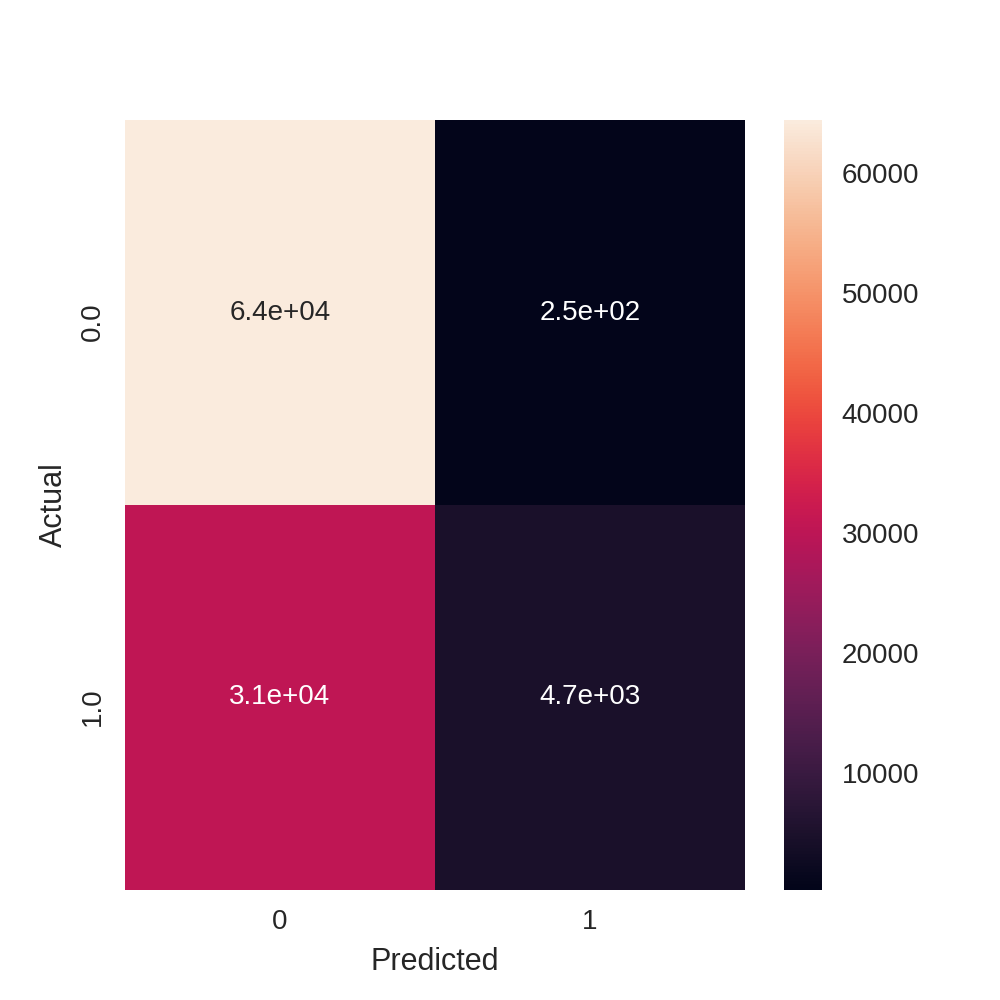

Predicted      0     1
Actual                
0.0        64414   247
1.0        30574  4745


In [122]:
plt.figure(figsize =(5, 5))
confusion_matrix = pd.crosstab(actual, predicted, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plt.savefig('anomaly heatmap.png')



To determine how well the KNN algorithm detected the anomalies, accuracy score between the actual and predicted values was calculated

In [119]:
accuracy_score(actual,predicted)


0.6917283456691339

Accuracy score of 69.17%, this is low, but given that there were not many feature included in the model, it is safe to say we are satisfy with this score 